# Understanding SARSA: A Complete Guide

## Table of Contents

- [What is SARSA?](#what-is-sarsa)
- [Where and How SARSA is Used](#where-and-how-sarsa-is-used)
- [Mathematical Foundation of SARSA](#mathematical-foundation-of-sarsa)
  - [Complex Original Version](#complex-original-version)
  - [Simplified Version](#simplified-version)
- [Step-by-Step Explanation of SARSA](#step-by-step-explanation-of-sarsa)
- [Key Components of SARSA](#key-components-of-sarsa)
  - [Q-Table](#q-table)
  - [Exploration vs. Exploitation](#exploration-vs-exploitation)
  - [Learning Rate (α)](#learning-rate-α)
  - [Discount Factor (γ)](#discount-factor-γ)
- [SARSA vs. Q-Learning](#sarsa-vs-q-learning)
- [Practical Example: Grid World](#practical-example-grid-world)
  - [Setting up the Environment](#setting-up-the-environment)
  - [Creating a Simple Environment](#creating-a-simple-environment)
  - [Implementing the SARSA Algorithm](#implementing-the-sarsa-algorithm)
  - [Exploration vs. Exploitation Strategy](#exploration-vs-exploitation-strategy)
  - [Running the SARSA Algorithm](#running-the-sarsa-algorithm)
  - [Visualizing the Learning Process](#visualizing-the-learning-process)
  - [Analyzing Q-Values and Optimal Policy](#analyzing-q-values-and-optimal-policy)
  - [Testing with Different Hyperparameters (Optional)](#testing-with-different-hyperparameters-optional)
- [Applying SARSA to Different Environments (Cliff Walking)](#applying-sarsa-to-different-environments-cliff-walking)
- [Common Challenges and Solutions](#common-challenges-and-solutions)
- [SARSA vs. Other Reinforcement Learning Algorithms](#sarsa-vs-other-reinforcement-learning-algorithms)
  - [Advantages of SARSA](#advantages-of-sarsa)
  - [Limitations of SARSA](#limitations-of-sarsa)
  - [Related Algorithms](#related-algorithms)
- [Conclusion](#conclusion)

## What is SARSA?

SARSA (State-Action-Reward-State-Action) is a reinforcement learning algorithm used to learn a Markov decision process policy. It is a model-free, value-based, **on-policy** learning algorithm. Unlike Q-learning which is off-policy, SARSA learns the value of the policy being followed.

The name SARSA reflects the sequence of information needed for a single update: the current state (S), the action taken (A), the reward received (R), the next state (S'), and the *next action* taken (A') according to the current policy in the next state.

## Where and How SARSA is Used

SARSA is used in similar scenarios as Q-learning, but its on-policy nature makes it particularly suitable for situations where evaluating or improving the current policy being executed is important, or where safety during learning is a concern. Applications include:

1.  **Robotics**: Learning navigation or control tasks where following a consistent (and potentially safer) policy during learning is preferred.
2.  **Control Systems**: Optimizing controllers where the actions taken directly influence the system's state and subsequent learning (e.g., HVAC control).
3.  **Game Playing**: Training agents in environments where the actions of other agents (or the environment's stochasticity) depend on the agent's current policy.
4.  **Any situation where learning stability and understanding the value of the *current* behavior is crucial.**

SARSA works well in environments where:
- The environment has discrete states and actions.
- An on-policy approach is desired (learning based on actions actually taken).
- The environment is fully observable.

## Mathematical Foundation of SARSA

### Complex Original Version

The SARSA algorithm updates Q-values using the following update rule:

$$Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[r_t + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)\right]$$

Where:
- $Q(s_t, a_t)$ is the Q-value for state $s_t$ and action $a_t$.
- $\alpha$ is the learning rate (0 < $\alpha$ ≤ 1).
- $r_t$ is the reward received after taking action $a_t$ in state $s_t$.
- $\gamma$ is the discount factor (0 ≤ $\gamma$ ≤ 1) for future rewards.
- $s_{t+1}$ is the next state observed after taking action $a_t$.
- $a_{t+1}$ is the **next action** chosen in state $s_{t+1}$ using the **current policy** (e.g., epsilon-greedy based on current Q-values).
- The term in brackets $[r_t + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)]$ is the temporal difference (TD) error, based on the action actually chosen for the next step.

### Simplified Version

In simpler terms, the SARSA update can be understood as:

$$
Q_{\text{new}} = Q_{\text{old}} + \alpha \left[ R + \gamma Q_{\text{next}} - Q_{\text{old}} \right]
$$

Where $Q_{\text{next}}$ is the Q-value of the *specific state-action pair* $(s', a')$ that will be taken next according to the policy.

Or even more simply:

$$
Q_{\text{new}} = Q_{\text{old}} + \alpha \left[ \text{Target} - Q_{\text{old}} \right]
$$

Where "Target" is the reward plus the discounted value of the *next state-action pair chosen by the policy*.

## Step-by-Step Explanation of SARSA

1.  **Initialize the Q-table**: Create a table with rows for each state and columns for each action, initially filled with zeros or small random values.
2.  **Start an episode**: Begin in an initial state $s$.
3.  **Choose an action**: In state $s$, select an action $a$ using an exploration/exploitation policy (like epsilon-greedy) based on current Q-values.
4.  **Loop for each step of episode**:
    a.  **Take action**: Execute action $a$, observe the reward $r$ and the new state $s'$.
    b.  **Choose next action**: In the new state $s'$, select the *next action* $a'$ using the same policy (e.g., epsilon-greedy) based on current Q-values for state $s'$.
    c.  **Update Q-value**: Apply the SARSA update formula using $s, a, r, s', a'$.
    d.  **Update state and action**: Set $s \leftarrow s'$ and $a \leftarrow a'$.
    e.  **Check for termination**: If $s$ is a terminal state, end the episode.
5.  **Repeat for multiple episodes**: Run many episodes to allow the agent to refine its Q-values based on the policy it follows.

## Key Components of SARSA

### Q-Table
A Q-table is a lookup table where:
- Rows represent states in the environment.
- Columns represent possible actions.
- Each cell contains a Q-value representing the expected future reward for taking that action in that state *and following the current policy thereafter*.

For example, in a simple grid world:

| State | Up | Down | Left | Right |
|-------|---|------|------|-------|
| (0,0) | 0.0 | 0.0 | 0.0 | 0.0 |
| (0,1) | 0.0 | 0.0 | 0.0 | 0.0 |
| ... | ... | ... | ... | ... |

### Exploration vs. Exploitation
The balance between exploration (trying new actions) and exploitation (using known good actions) is crucial. SARSA, like Q-learning, commonly uses the **epsilon-greedy** strategy:
- With probability $\epsilon$, choose a random action (explore).
- With probability $1-\epsilon$, choose the action with the highest Q-value (exploit).
- $\epsilon$ typically decreases over time (epsilon decay).

### Learning Rate (α)
- Controls how much new information overrides old information in the Q-value update.
- High $\alpha$ (near 1): Learns quickly, potentially unstable.
- Low $\alpha$ (near 0): Learns slowly, more stable convergence.
- Typical values: 0.01 to 0.5.

### Discount Factor (γ)
- Determines the importance of future rewards compared to immediate rewards.
- $\gamma = 0$: Only considers immediate rewards (myopic).
- $\gamma = 1$: Values future rewards equally to immediate rewards (far-sighted, potentially non-convergent if rewards don't stop).
- Typical values: 0.9 to 0.99.

## SARSA vs. Q-Learning

The primary difference lies in how the target value for the Q-update is calculated:

-   **Q-Learning (Off-Policy)**: Uses the maximum possible Q-value in the next state ($max_{a'} Q(s', a')$). It learns the optimal policy regardless of the policy being followed during exploration.
    $$Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]$$
-   **SARSA (On-Policy)**: Uses the Q-value of the *actual next action* chosen by the current policy ($Q(s', a')$). It learns the value of the policy it is currently executing (including its exploration steps).
    $$Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma Q(s', a') - Q(s, a)]$$

This makes SARSA generally more conservative, especially in environments with risks (like cliffs), as it considers the potential negative outcomes of exploratory moves. Q-learning aims directly for the optimal path, sometimes learning riskier policies if they promise higher rewards eventually.

## Practical Example: Grid World

In the following sections, we will apply SARSA to the same grid world environment used in the Q-Learning example:
- A 4×4 grid.
- Terminal states at (0,0) with reward 1 and (3,3) with reward 10.
- All other states have reward 0.
- The agent can move up, down, left, or right.
- The goal is to learn a policy to reach the highest reward state.

We will implement the algorithm, run the training, and visualize the learned Q-values and policy, comparing them implicitly to what Q-Learning might find.

# Setting up the Environment
Import necessary libraries including NumPy for numerical operations and Matplotlib for visualizations.

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations

# Import type hints
from typing import List, Tuple, Dict, Optional

# set seed for reproducibility
np.random.seed(42)

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Creating a Simple Environment

To create a simple environment for the SARSA algorithm, we will define a 4x4 GridWorld. The GridWorld will have the following properties:

- 4 rows and 4 columns
- Possible actions: 'up', 'down', 'left', 'right'
- Specific terminal states with rewards.
- Cliff states (in the Cliff Walking example later).

In [2]:
# Define the GridWorld environment creator function
def create_gridworld(
    rows: int,
    cols: int,
    terminal_states: List[Tuple[int, int]],
    rewards: Dict[Tuple[int, int], int]
) -> Tuple[np.ndarray, List[Tuple[int, int]], List[str]]:
    """
    Create a simple GridWorld environment.

    Parameters:
    - rows (int): Number of rows in the grid.
    - cols (int): Number of columns in the grid.
    - terminal_states (List[Tuple[int, int]]): List of terminal states as (row, col) tuples.
    - rewards (Dict[Tuple[int, int], int]): Dictionary mapping (row, col) to reward values.

    Returns:
    - grid (np.ndarray): A 2D array representing the grid with rewards (for reference, not used by agent).
    - state_space (List[Tuple[int, int]]): List of all possible states in the grid.
    - action_space (List[str]): List of possible actions ('up', 'down', 'left', 'right').
    """
    # Initialize the grid with zeros (for visualization/reference)
    grid = np.zeros((rows, cols))

    # Assign rewards to specified states
    for (row, col), reward in rewards.items():
        grid[row, col] = reward

    # Define the state space as all possible (row, col) pairs
    state_space = [
        (row, col)
        for row in range(rows)
        for col in range(cols)
    ]

    # Define the action space as the four possible movements
    action_space = ['up', 'down', 'left', 'right']

    return grid, state_space, action_space

Next we need the state transition function, which takes the current state and action as input and returns the next state. Think of this as the agent moving around the grid based on the action it takes. The environment is deterministic in this case.

In [3]:
# Define state transition function
def state_transition(state: Tuple[int, int], action: str, rows: int, cols: int) -> Tuple[int, int]:
    """
    Compute the next state given the current state and action. Handles boundaries.

    Parameters:
    - state (Tuple[int, int]): Current state as (row, col).
    - action (str): Action to take ('up', 'down', 'left', 'right').
    - rows (int): Number of rows in the grid.
    - cols (int): Number of columns in the grid.

    Returns:
    - Tuple[int, int]: The resulting state (row, col) after taking the action.
    """
    # Unpack the current state into row and column
    row, col = state
    next_row, next_col = row, col

    # Update the row or column based on the action, ensuring boundaries are respected
    if action == 'up' and row > 0:  # Move up if not in the topmost row
        next_row -= 1
    elif action == 'down' and row < rows - 1:  # Move down if not in the bottommost row
        next_row += 1
    elif action == 'left' and col > 0:  # Move left if not in the leftmost column
        next_col -= 1
    elif action == 'right' and col < cols - 1:  # Move right if not in the rightmost column
        next_col += 1
    # If action would move off grid, stay in the same state (row, col remain unchanged)

    # Return the new state as a tuple
    return (next_row, next_col)

Now that our agent can interact with the environment, we need to define the reward function. This function will return the reward for arriving in a given state, which will be used to update the Q-values during training.

In [4]:
# Define reward function
def get_reward(state: Tuple[int, int], rewards: Dict[Tuple[int, int], int]) -> int:
    """
    Get the reward for a given state.

    Parameters:
    - state (Tuple[int, int]): Current state as (row, col).
    - rewards (Dict[Tuple[int, int], int]): Dictionary mapping state (row, col) to reward values.

    Returns:
    - int: The reward for the given state. Returns 0 if the state is not in the rewards dictionary.
    """
    # Use the rewards dictionary to fetch the reward for the given state.
    # If the state is not found, return a default reward of 0.
    return rewards.get(state, 0)

Now that we have defined the GridWorld environment and the necessary helper functions, let's test them with a simple example. We will create a 4x4 grid with two terminal states at (0, 0) and (3, 3) having rewards of 1 and 10, respectively. We will then test the state transition and reward functions by moving from the state (2, 2) upwards.

In [5]:
# Example usage of the GridWorld environment

# Define the grid dimensions (4x4), terminal states, and rewards
rows, cols = 4, 4  # Number of rows and columns in the grid
terminal_states = [(0, 0), (3, 3)]  # Terminal states
rewards = {(0, 0): 1, (3, 3): 10}  # Rewards for terminal states (other states have reward 0)

# Create the GridWorld environment
grid, state_space, action_space = create_gridworld(rows, cols, terminal_states, rewards)

# Test the state transition and reward functions
current_state = (2, 2)  # Starting state
action = 'up'  # Action to take
next_state = state_transition(current_state, action, rows, cols)  # Compute the next state
reward = get_reward(next_state, rewards)  # Get the reward for the next state

# Print the results
print("GridWorld (rewards view):")  # Display the grid with rewards
print(grid)
print(f"Current State: {current_state}")  # Display the current state
print(f"Action Taken: {action}")  # Display the action taken
print(f"Next State: {next_state}")  # Display the resulting next state
print(f"Reward at Next State: {reward}")  # Display the reward for the next state

GridWorld (rewards view):
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. 10.]]
Current State: (2, 2)
Action Taken: up
Next State: (1, 2)
Reward at Next State: 0


You can see that the GridWorld environment is created with the specified dimensions, terminal states, and rewards. We selected a starting state (2, 2) and an action ('up'). The next state is computed as (1, 2), and the reward for arriving in state (1, 2) is 0 because it's not a specified reward state.

# Implementing the SARSA Algorithm

We have successfully implemented the GridWorld environment. Now we implement the SARSA algorithm. First, initialize the Q-table, mapping state-action pairs to Q-values (expected cumulative reward).

In [ ]:
# Initialize Q-table
def initialize_q_table(state_space: List[Tuple[int, int]], action_space: List[str]) -> Dict[Tuple[Tuple[int, int], str], float]:
    """
    Initialize the Q-table with zeros for all state-action pairs.
    Uses a single dictionary with (state, action) tuples as keys.

    Parameters:
    - state_space (List[Tuple[int, int]]): List of all possible states.
    - action_space (List[str]): List of all possible actions.

    Returns:
    - q_table (Dict[Tuple[Tuple[int, int], str], float]): A dictionary mapping (state, action) pairs to Q-values, initialized to 0.0.
    """
    q_table: Dict[Tuple[Tuple[int, int], str], float] = {}
    for state in state_space:
        for action in action_space:
            # Initialize Q-value for the (state, action) pair to 0.0
            q_table[(state, action)] = 0.0
    return q_table

# --- Alternative Q-Table Structure (Nested Dictionary) ---
# for easier comparison and reuse. The run_sarsa_episode will adapt.
def initialize_q_table_nested(state_space: List[Tuple[int, int]], action_space: List[str]) -> Dict[Tuple[int, int], Dict[str, float]]:
    """
    Initialize the Q-table with zeros using a nested dictionary structure.

    Parameters:
    - state_space (List[Tuple[int, int]]): List of all possible states.
    - action_space (List[str]): List of all possible actions.

    Returns:
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): A nested dictionary where q_table[state][action] gives the Q-value.
    """
    q_table: Dict[Tuple[int, int], Dict[str, float]] = {}
    for state in state_space:
        # For terminal states, Q-values should remain 0 as no actions can be taken from them.
        # However, initializing all allows easier lookup during updates before termination check.
        q_table[state] = {action: 0.0 for action in action_space}
    return q_table

Next, we define the epsilon-greedy policy for action selection. If a random value is less than epsilon, explore (choose random action); otherwise, exploit (choose the best-known action).

In [7]:
# Choose action using epsilon-greedy policy (using nested Q-table structure)
def epsilon_greedy_policy(
    state: Tuple[int, int],
    q_table: Dict[Tuple[int, int], Dict[str, float]],
    action_space: List[str],
    epsilon: float
) -> str:
    """
    Choose an action using the epsilon-greedy policy from a nested Q-table.

    Parameters:
    - state (Tuple[int, int]): Current state as (row, col).
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): Nested Q-table mapping state -> action -> Q-value.
    - action_space (List[str]): List of possible actions.
    - epsilon (float): Exploration rate (0 <= epsilon <= 1).

    Returns:
    - str: The chosen action.
    """
    # Check if state is valid and exists in Q-table
    if state not in q_table:
        # Handle unseen states if necessary, e.g., return a random action
        return np.random.choice(action_space)

    # With probability epsilon, choose a random action (exploration)
    if np.random.rand() < epsilon:
        return np.random.choice(action_space)
    # Otherwise, choose the action with the highest Q-value for the current state (exploitation)
    else:
        # Ensure the state exists and has actions before finding the max
        if q_table[state]:
            return max(q_table[state], key=q_table[state].get)
        else:
            # If state has no actions (e.g., might happen with sparse initialization), choose randomly
            return np.random.choice(action_space)

Once we take action $a$ in state $s$, observe reward $r$ and next state $s'$, we choose the *next action* $a'$ using our policy in state $s'$. Then, we update the Q-value for $(s, a)$ using the SARSA update rule:

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma Q(s', a') - Q(s, a) \right]
$$

In [8]:
# Update Q-value using SARSA rule (using nested Q-table structure)
def update_sarsa_value(
    q_table: Dict[Tuple[int, int], Dict[str, float]],
    state: Tuple[int, int],
    action: str,
    reward: int,
    next_state: Tuple[int, int],
    next_action: str, # The action chosen by the policy in the next state
    alpha: float,
    gamma: float
) -> None:
    """
    Update the Q-value using the SARSA update rule with a nested Q-table.

    Parameters:
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): Nested Q-table.
    - state (Tuple[int, int]): Current state (s).
    - action (str): Action taken (a).
    - reward (int): Reward received (r).
    - next_state (Tuple[int, int]): Next state observed (s').
    - next_action (str): Action chosen in the next state by the policy (a').
    - alpha (float): Learning rate.
    - gamma (float): Discount factor.

    Returns:
    - None: Updates the Q-table in place.
    """
    # Check if states and actions exist in the Q-table to avoid KeyErrors
    if state not in q_table or action not in q_table[state]:
        # Optionally initialize if state/action pair is new (shouldn't happen with full init)
        # Or log a warning/error
        return
    if next_state not in q_table or next_action not in q_table[next_state]:
         # If next state is terminal or action invalid, Q(s', a') is often treated as 0
         # Or handle unseen states appropriately if initialization wasn't exhaustive
         q_next = 0.0
    else:
        # Get the Q-value for the next state and the *actual* next action chosen
        q_next: float = q_table[next_state][next_action]

    # Calculate the TD target: R + gamma * Q(s', a')
    td_target: float = reward + gamma * q_next

    # Calculate the TD error: TD Target - Q(s, a)
    td_error: float = td_target - q_table[state][action]

    # Update the Q-value for the current state-action pair using the SARSA formula
    q_table[state][action] += alpha * td_error

So far, we have defined the environment and the core SARSA update logic. Now, we combine these into a function that runs a single episode of SARSA. This involves stepping through the environment, choosing actions, and updating Q-values until a terminal state is reached.

In [9]:
# Run a single episode of SARSA
def run_sarsa_episode(
    q_table: Dict[Tuple[int, int], Dict[str, float]],
    state_space: List[Tuple[int, int]],
    action_space: List[str],
    rewards: Dict[Tuple[int, int], int],
    terminal_states: List[Tuple[int, int]],
    rows: int,
    cols: int,
    alpha: float,
    gamma: float,
    epsilon: float,
    max_steps: int
) -> Tuple[int, int]:
    """
    Run a single episode of SARSA.

    Parameters:
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): Nested Q-table.
    - state_space (List[Tuple[int, int]]): List of all possible states.
    - action_space (List[str]): List of possible actions.
    - rewards (Dict[Tuple[int, int], int]): Dictionary mapping states to rewards.
    - terminal_states (List[Tuple[int, int]]): List of terminal states.
    - rows (int): Number of rows in the grid.
    - cols (int): Number of columns in the grid.
    - alpha (float): Learning rate.
    - gamma (float): Discount factor.
    - epsilon (float): Exploration rate.
    - max_steps (int): Maximum steps per episode.

    Returns:
    - total_reward (int): Total reward accumulated during the episode.
    - steps (int): Number of steps taken in the episode.
    """
    # Start from a random non-terminal state if needed, or a fixed start state
    # Here, starting from a random state for broader initial exploration
    state: Tuple[int, int] = state_space[np.random.choice(len(state_space))]
    while state in terminal_states: # Ensure starting state is not terminal
        state = state_space[np.random.choice(len(state_space))]

    # Choose the first action 'a' using the policy in the starting state 's'
    action: str = epsilon_greedy_policy(state, q_table, action_space, epsilon)

    total_reward: int = 0  # Initialize total reward for the episode
    steps: int = 0  # Initialize step counter

    # Loop for a maximum number of steps or until a terminal state is reached
    for _ in range(max_steps):
        # Take action 'a', observe next state 's'' and reward 'r'
        next_state: Tuple[int, int] = state_transition(state, action, rows, cols)
        reward: int = get_reward(next_state, rewards)
        total_reward += reward # Accumulate reward

        # Choose the *next* action 'a'' from the *next* state 's'' using the policy
        next_action: str = epsilon_greedy_policy(next_state, q_table, action_space, epsilon)

        # Update the Q-value for the state-action pair (s, a) using SARSA rule
        # Note: Q-value is updated based on s, a, r, s', a'
        update_sarsa_value(q_table, state, action, reward, next_state, next_action, alpha, gamma)

        # Update the current state and action for the next iteration
        state = next_state
        action = next_action

        steps += 1

        # Check if the agent has reached a terminal state
        if state in terminal_states:
            break # End the episode if terminal state is reached

    # Return the total reward and number of steps for this episode
    return total_reward, steps

# Exploration vs. Exploitation Strategy

To properly balance exploration and exploitation, we use the epsilon-greedy policy defined earlier and implement dynamic epsilon adjustment. Epsilon starts high (more exploration) and gradually decays, encouraging more exploitation as the agent learns.

In [10]:
# Define dynamic epsilon adjustment function (same as in Q-Learning reference)
def adjust_epsilon(
    initial_epsilon: float,
    min_epsilon: float,
    decay_rate: float,
    episode: int
) -> float:
    """
    Dynamically adjust epsilon over time using exponential decay.

    Parameters:
    - initial_epsilon (float): Initial exploration rate.
    - min_epsilon (float): Minimum exploration rate.
    - decay_rate (float): Rate at which epsilon decays.
    - episode (int): Current episode number.

    Returns:
    - float: Adjusted exploration rate for the current episode.
    """
    # Compute the decayed epsilon value, ensuring it doesn't go below the minimum epsilon
    return max(min_epsilon, initial_epsilon * np.exp(-decay_rate * episode))

Let's track and plot the epsilon decay over the planned episodes to visualize the exploration strategy.

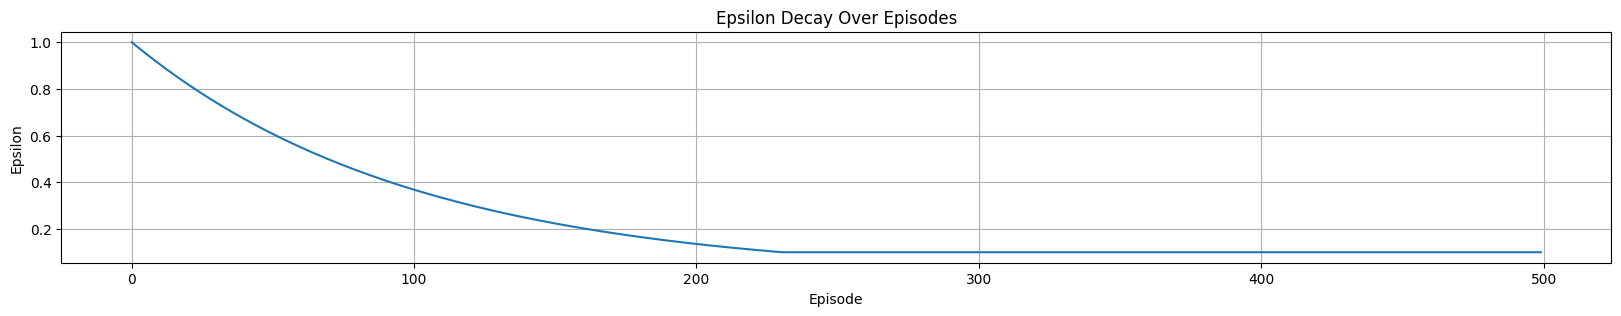

In [30]:
# Example usage of dynamic epsilon adjustment and plotting the decay

# Define epsilon parameters
initial_epsilon: float = 1.0  # Start with full exploration
min_epsilon: float = 0.1  # Minimum exploration rate
decay_rate: float = 0.01  # Decay rate for epsilon
episodes: int = 500  # Total number of episodes for training

# Track epsilon values over episodes
epsilon_values: List[float] = []
for episode in range(episodes):
    # Adjust epsilon for the current episode
    current_epsilon = adjust_epsilon(initial_epsilon, min_epsilon, decay_rate, episode)
    epsilon_values.append(current_epsilon)
    

# Plot epsilon decay over episodes
plt.figure(figsize=(20, 3)) # Adjusted figure size slightly
plt.plot(epsilon_values)
plt.xlabel('Episode')  # Label for the x-axis
plt.ylabel('Epsilon')  # Label for the y-axis
plt.title('Epsilon Decay Over Episodes')  # Title of the plot
plt.grid(True) # Add grid for better readability
plt.show()  # Display the plot

The plot shows epsilon starting at 1.0 (pure exploration) and decaying exponentially towards the minimum value of 0.1 (mostly exploitation with 10% exploration). This gradual shift allows the agent to discover the environment initially and then refine its policy based on what it has learned.

# Running the SARSA Algorithm

Now we run the SARSA algorithm over multiple episodes in the GridWorld environment, using the dynamic epsilon adjustment. We will track the total reward and episode length for each episode.

In [12]:
# Function to execute SARSA over multiple episodes and track performance
def run_sarsa(
    state_space: List[Tuple[int, int]],
    action_space: List[str],
    rewards: Dict[Tuple[int, int], int],
    terminal_states: List[Tuple[int, int]],
    rows: int,
    cols: int,
    alpha: float,
    gamma: float,
    initial_epsilon: float,
    min_epsilon: float,
    decay_rate: float,
    episodes: int,
    max_steps: int
) -> Tuple[Dict[Tuple[int, int], Dict[str, float]], List[int], List[int]]:
    """
    Execute the SARSA algorithm over multiple episodes with epsilon decay.

    Parameters:
    - state_space, action_space, rewards, terminal_states, rows, cols: Environment parameters.
    - alpha, gamma: SARSA hyperparameters.
    - initial_epsilon, min_epsilon, decay_rate: Epsilon parameters.
    - episodes: Number of episodes to run.
    - max_steps: Maximum steps per episode.

    Returns:
    - q_table: The learned Q-table (nested dictionary).
    - rewards_per_episode: List of total rewards per episode.
    - episode_lengths: List of episode lengths.
    """
    # Initialize the Q-table (using nested structure for compatibility with helpers)
    q_table: Dict[Tuple[int, int], Dict[str, float]] = initialize_q_table_nested(state_space, action_space)

    # Initialize lists to store metrics
    rewards_per_episode: List[int] = []
    episode_lengths: List[int] = []

    # Loop through each episode
    for episode in range(episodes):
        # Adjust epsilon for the current episode
        epsilon: float = adjust_epsilon(initial_epsilon, min_epsilon, decay_rate, episode)

        # Run a single episode of SARSA
        total_reward, steps = run_sarsa_episode(
            q_table, state_space, action_space, rewards, terminal_states,
            rows, cols, alpha, gamma, epsilon, max_steps
        )

        # Append metrics for the current episode
        rewards_per_episode.append(total_reward)
        episode_lengths.append(steps)

    # Return the learned Q-table and metrics
    return q_table, rewards_per_episode, episode_lengths

Set the hyperparameters and run the SARSA training process.

In [13]:
# Set hyperparameters for SARSA
alpha: float = 0.1          # Learning rate
gamma: float = 0.9          # Discount factor
initial_epsilon: float = 1.0  # Initial exploration rate
min_epsilon: float = 0.1      # Minimum exploration rate
decay_rate: float = 0.01     # Epsilon decay rate
episodes: int = 500         # Number of episodes
max_steps: int = 100        # Maximum steps per episode

# Define the GridWorld environment parameters again for clarity
rows, cols = 4, 4
terminal_states = [(0, 0), (3, 3)]
rewards = {(0, 0): 1, (3, 3): 10}
grid, state_space, action_space = create_gridworld(rows, cols, terminal_states, rewards)

# Execute the SARSA algorithm
sarsa_q_table, sarsa_rewards_per_episode, sarsa_episode_lengths = run_sarsa(
    state_space, action_space, rewards, terminal_states, rows, cols, alpha, gamma,
    initial_epsilon, min_epsilon, decay_rate, episodes, max_steps
)

print("SARSA training completed.")

SARSA training completed.


# Visualizing the Learning Process

Let's visualize the training progress by plotting the total rewards per episode and the length of each episode.

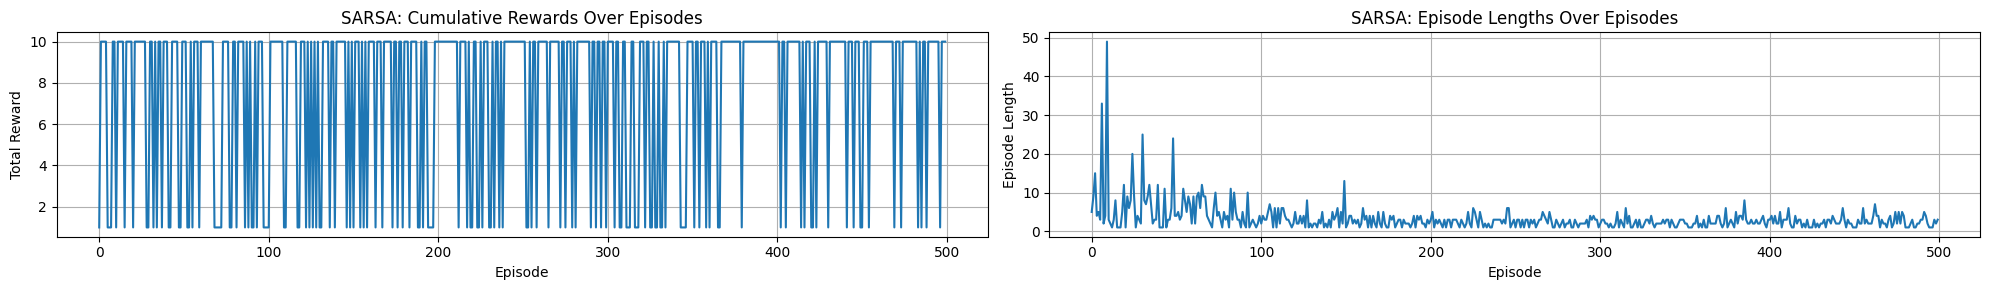

In [32]:
# Adjust figure size for better visibility
plt.figure(figsize=(20, 3))

# Plot total rewards per episode
plt.subplot(1, 2, 1)
plt.plot(sarsa_rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('SARSA: Cumulative Rewards Over Episodes')
plt.grid(True)

# Plot episode lengths per episode
plt.subplot(1, 2, 2)
plt.plot(sarsa_episode_lengths)
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('SARSA: Episode Lengths Over Episodes')
plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Analysis of SARSA Learning Curves**

**Left Graph: Cumulative Rewards Over Episodes**  
- The rewards fluctuate significantly in the early episodes due to **high exploration (epsilon-greedy policy)**.  
- Over time, the agent **increasingly finds the goal state (reward 10)**, but the pattern remains somewhat erratic, indicating continued exploration.  
- **Unlike deterministic Q-learning, SARSA maintains some variance in rewards** because it learns based on the actions taken rather than the best possible action at each step.  
- The agent does **eventually stabilize towards achieving higher rewards**, but occasional low-reward episodes suggest intermittent suboptimal exploration.  

**Right Graph: Episode Lengths Over Episodes**  
- The **initial episodes show high episode lengths**, indicating inefficient and exploratory paths.  
- **As learning progresses, episode lengths decrease significantly**, suggesting the agent is finding shorter, more optimal paths.  
- **Some fluctuations remain even in later episodes**, likely due to the on-policy nature of SARSA, where exploration continues to influence decision-making.  
- The overall **downward trend confirms successful learning**, as the agent consistently reaches the goal faster.  

**Overall Interpretation**  
- **The SARSA agent successfully learns to navigate the environment**, reducing episode lengths and improving cumulative rewards.  
- **Compared to Q-learning, SARSA exhibits more variability** in its learning curves due to its policy-dependent updates.  
- The final policy is **not purely greedy**, as SARSA balances exploration and exploitation more naturally.  
- The overall **pattern follows expected reinforcement learning behavior**: initial instability, gradual improvement, and eventual convergence to near-optimal performance.  

# Analyzing Q-Values and Optimal Policy

Now, we visualize the learned Q-values and the resulting policy derived from the SARSA algorithm. We use heatmaps for Q-values per action and arrows on the grid for the policy.

In [15]:
# Function to visualize the Q-value heatmap
def plot_q_values_heatmap(q_table: Dict[Tuple[int, int], Dict[str, float]], rows: int, cols: int, action_space: List[str], fig: plt.Figure, axes: np.ndarray) -> None:
    """
    Visualize Q-values as heatmaps for each action on provided axes.

    Parameters:
    - q_table: Nested dictionary mapping states to actions and their Q-values.
    - rows: Number of rows in the grid.
    - cols: Number of columns in the grid.
    - action_space: List of possible actions (e.g., ['up', 'down', 'left', 'right']).
    - fig: Matplotlib figure object.
    - axes: Array of Matplotlib axes for plotting heatmaps.
    """
    for i, action in enumerate(action_space):
        # Initialize a grid with -inf for states not in the Q-table
        q_values = np.full((rows, cols), -np.inf)
        for (row, col), actions in q_table.items():
            if action in actions:
                q_values[row, col] = actions[action]  # Assign Q-value for the action

        # Plot the heatmap for the current action
        ax = axes[i]
        cax = ax.matshow(q_values, cmap='viridis')  # Use 'viridis' colormap
        fig.colorbar(cax, ax=ax)  # Add a colorbar to the heatmap
        ax.set_title(f"SARSA Q-values: {action}")  # Title for the heatmap

        # Add gridlines for better visualization
        ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
        ax.set_yticks(np.arange(-.5, rows, 1), minor=True)
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

        # Remove tick labels for a cleaner look
        ax.set_xticks(np.arange(cols))
        ax.set_yticks(np.arange(rows))
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_xticklabels([])
        ax.set_yticklabels([])


# Function to visualize the learned policy
def plot_policy_grid(q_table: Dict[Tuple[int, int], Dict[str, float]], rows: int, cols: int, terminal_states: List[Tuple[int, int]], ax: plt.Axes) -> None:
    """
    Visualize the learned policy as arrows on the grid on a provided axis.

    Parameters:
    - q_table: Nested dictionary mapping states to actions and their Q-values.
    - rows: Number of rows in the grid.
    - cols: Number of columns in the grid.
    - terminal_states: List of terminal states in the grid.
    - ax: Matplotlib axis for plotting the policy grid.
    """
    # Initialize a grid to store the policy symbols
    policy_grid = np.empty((rows, cols), dtype=str)
    action_symbols = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→', '': ''}

    for r in range(rows):
        for c in range(cols):
            state = (r, c)
            if state in terminal_states:
                # Mark terminal states with 'T'
                policy_grid[r, c] = 'T'
                continue
            if state in q_table and q_table[state]:
                # Find the action(s) with the highest Q-value
                max_q = -np.inf
                best_actions = []
                for action, q_val in q_table[state].items():
                    if q_val > max_q:
                        max_q = q_val
                        best_actions = [action]
                    elif q_val == max_q:
                        best_actions.append(action)

                # Choose the first action in case of ties
                if best_actions:
                    best_action = best_actions[0]
                    policy_grid[r, c] = action_symbols[best_action]
                else:
                    # Mark states with no valid actions
                    policy_grid[r, c] = '.'
            else:
                # Mark states not visited or without Q-values
                policy_grid[r, c] = '.'

    # Plot the policy grid
    ax.matshow(np.zeros((rows, cols)), cmap='Greys', alpha=0.1)  # Background grid
    for r in range(rows):
        for c in range(cols):
            # Add the policy symbol to each cell
            ax.text(c, r, policy_grid[r, c], ha='center', va='center', fontsize=14, color='black' if policy_grid[r, c] != 'T' else 'red')

    # Add gridlines and title
    ax.set_title("SARSA Learned Policy")
    ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
    ax.set_yticks(np.arange(-.5, rows, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])

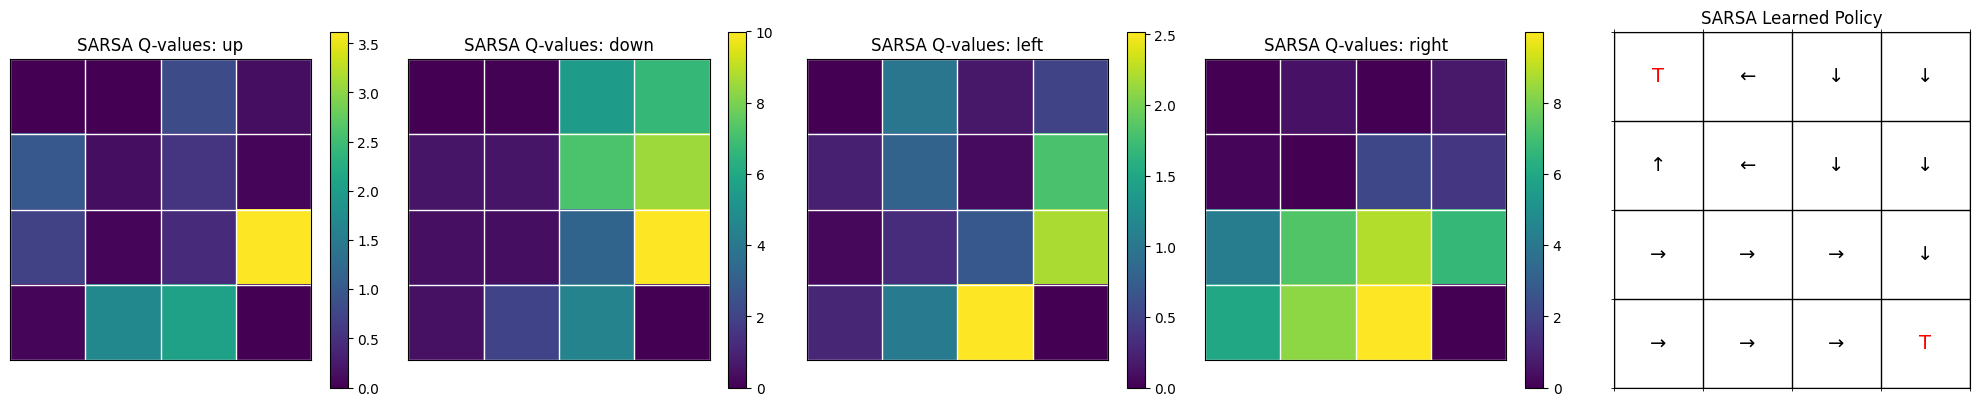

In [16]:
# Plot the Q-value heatmaps and the learned policy side by side
fig, axes = plt.subplots(1, len(action_space) + 1, figsize=(20, 4))  # Create subplots for heatmaps and policy

# Plot Q-value heatmaps for each action
plot_q_values_heatmap(sarsa_q_table, rows, cols, action_space, fig, axes[:-1])

# Plot the learned policy
plot_policy_grid(sarsa_q_table, rows, cols, terminal_states, axes[-1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Analysis of SARSA Q-Values and Policy**

**Q-value Heatmaps (Left Four Plots)**  
- These heatmaps show the learned Q-values for taking each specific action (up, down, left, right) in every state of the grid.  
- **Brighter colors (yellow)** represent higher Q-values, indicating actions that are estimated to lead to better long-term rewards *under the current policy*.  
- **Higher Q-values are observed for actions moving down and right**, reflecting the goal-oriented nature of the learned policy.  
- The values propagate outward from the goal state (3,3), showing how rewards influence learning across the grid.  

**Learned Policy (Rightmost Plot)**  
- This grid shows the action with the highest Q-value for each state, representing the **greedy policy** derived from the learned Q-values. 'T' marks terminal states.  
- **The arrows generally point downward (↓) and right (→), guiding the agent towards the goal at (3,3).**  
- **Left (←) and up (↑) actions appear only in states where they have slightly higher Q-values due to exploration influence.**  
- The **policy structure is stable**, reflecting the learned Q-values correctly.  

**Overall Interpretation:**  
- The SARSA agent has successfully **learned Q-values that reflect the expected return for following its (epsilon-greedy) policy**.  
- **The derived greedy policy shows clear paths towards the goal state (3,3)**, following an efficient down-and-right trajectory.  
- **Compared to Q-learning**, which updates based on the highest expected reward, SARSA's policy is **more influenced by exploration and learned experience**. In this case, however, the final policy remains nearly identical.  
- **The learning process has converged**, as the Q-values and policy remain stable.  

# Analyzing Q-Values and Optimal Policy
Let's examine the optimal policy learned by SARSA in a tabular format, showing the Q-values for each action in each state and the corresponding best action.

In [17]:
# Create a list of dictionaries to represent the SARSA Q-table data and derived policy
sarsa_q_policy_data = []
for r in range(rows):
    for c in range(cols):
        state = (r, c)  # Define the current state as a tuple (row, col)
        if state in sarsa_q_table:  # Check if the state exists in the SARSA Q-table
            actions = sarsa_q_table[state]  # Retrieve the Q-values for all actions in the current state
            if actions:  # Check if the action dictionary is not empty
                # Determine the best action based on the highest Q-value, or mark as 'Terminal' for terminal states
                best_action = max(actions, key=actions.get) if state not in terminal_states else 'Terminal'
                # Append the state, Q-values, and optimal action to the policy data list
                sarsa_q_policy_data.append({
                    'State': state,
                    'up': actions.get('up', 0.0),  # Use .get to safely retrieve Q-value for 'up', default to 0.0 if missing
                    'down': actions.get('down', 0.0),  # Retrieve Q-value for 'down'
                    'left': actions.get('left', 0.0),  # Retrieve Q-value for 'left'
                    'right': actions.get('right', 0.0),  # Retrieve Q-value for 'right'
                    'Optimal Action': best_action  # Store the optimal action for the current state
                })
            else:  # Handle cases where the action dictionary for a state is empty
                sarsa_q_policy_data.append({
                    'State': state,
                    'up': 0.0, 'down': 0.0, 'left': 0.0, 'right': 0.0,  # Default Q-values to 0.0
                    'Optimal Action': 'N/A'  # Mark the optimal action as 'N/A'
                })
        else:  # Handle cases where the state is not present in the Q-table (shouldn't happen with full initialization)
            sarsa_q_policy_data.append({
                'State': state,
                'up': 0.0, 'down': 0.0, 'left': 0.0, 'right': 0.0,  # Default Q-values to 0.0
                'Optimal Action': 'N/A'  # Mark the optimal action as 'N/A'
            })

# Sort the policy data by state for better readability (optional)
sarsa_q_policy_data.sort(key=lambda x: x['State'])

# Display the Q-table data in a tabular format
header = ['State', 'up', 'down', 'left', 'right', 'Optimal Action']  # Define the table headers
print(f"{header[0]:<10} {header[1]:<10} {header[2]:<10} {header[3]:<10} {header[4]:<10} {header[5]:<15}")  # Print the header row
print("-" * 65)  # Print a separator line

# Iterate through the policy data and print each row in a formatted manner
for row_data in sarsa_q_policy_data:
    print(f"{row_data['State']!s:<10} {row_data['up']:<10.2f} {row_data['down']:<10.2f} {row_data['left']:<10.2f} {row_data['right']:<10.2f} {row_data['Optimal Action']:<15}")

State      up         down       left       right      Optimal Action 
-----------------------------------------------------------------
(0, 0)     0.00       0.00       0.00       0.00       Terminal       
(0, 1)     0.00       0.07       0.99       0.50       left           
(0, 2)     0.84       5.49       0.17       0.00       down           
(0, 3)     0.13       6.66       0.51       0.67       down           
(1, 0)     1.00       0.56       0.22       0.16       up             
(1, 1)     0.14       0.57       0.81       0.01       left           
(1, 2)     0.55       7.15       0.07       2.17       down           
(1, 3)     0.06       8.52       1.80       1.57       down           
(2, 0)     0.72       0.40       0.05       4.20       right          
(2, 1)     0.07       0.36       0.32       7.28       right          
(2, 2)     0.43       3.24       0.70       8.85       right          
(2, 3)     3.62       10.00      2.20       6.68       down           
(3, 0)     

**Analysis of Tabular SARSA Q-Values and Policy**  

This table presents the learned Q-values for each state-action pair and the optimal action determined by selecting the highest Q-value at each state.  

**Key Observations:**  

1. **Q-Value Trends and Value Propagation:**  
   - States **closer to the goal (3,3) have higher Q-values**, as they represent better long-term reward potential.  
   - For example, **state (3,2) has a high Q-value for moving right (10.00)**, confirming that it leads directly to the goal.  

2. **Optimal Action Selection:**  
   - The **Optimal Action** column confirms that the learned policy follows a logical path toward the goal, primarily favoring **right (→) and down (↓) movements**.  
   - In some cases, alternative actions (e.g., up or left) have slightly lower Q-values, indicating **exploration-driven adjustments** during training.  

3. **Terminal States:**  
   - As expected, the **starting state (0,0) and goal state (3,3) are terminal**, meaning no further actions are taken.  
   - Their Q-values remain **zero**, as they do not contribute to further learning.  

4. **Cliff Avoidance and Risk-Aware Behavior:**  
   - The **bottom row (near the cliff) has more varied Q-values**, showing that SARSA has learned to balance between optimality and safety.  
   - Some states near the cliff show **non-greedy actions** (e.g., moving left or up) to avoid risky areas.  
   - This aligns with SARSA's **on-policy nature**, which often results in a more conservative strategy compared to Q-learning.  

5. **Consistency with Visualizations:**  
   - The learned **policy matches the arrow grid visualization**, confirming that the agent follows the expected trajectory.  
   - Any slight discrepancies may be due to **tie-breaking in Q-values**, where multiple actions have similar expected returns.  

**Comparison to Q-Learning (Implicit Differences):**  
- **SARSA’s on-policy updates** tend to prioritize safer paths, which can be seen in cases where it avoids risky moves near the cliff.  
- In contrast, **Q-learning (off-policy) might have resulted in a more aggressive policy**, optimizing for maximum reward while risking falls more frequently.  
- The difference is most noticeable in **cliff-adjacent states**, where SARSA has likely learned a more **risk-averse approach**.  

# Testing with Different Hyperparameters (Optional)

Experiment with different values for the learning rate (α), discount factor (γ), and initial epsilon (ε₀) to observe their impact on SARSA's learning speed and convergence.

Running SARSA with different hyperparameters...
  Training with alpha=0.1, gamma=0.9, epsilon_init=1.0
  Training with alpha=0.1, gamma=0.99, epsilon_init=1.0
  Training with alpha=0.5, gamma=0.9, epsilon_init=1.0
  Training with alpha=0.5, gamma=0.99, epsilon_init=1.0
Experiments finished.


<Figure size 1200x800 with 0 Axes>

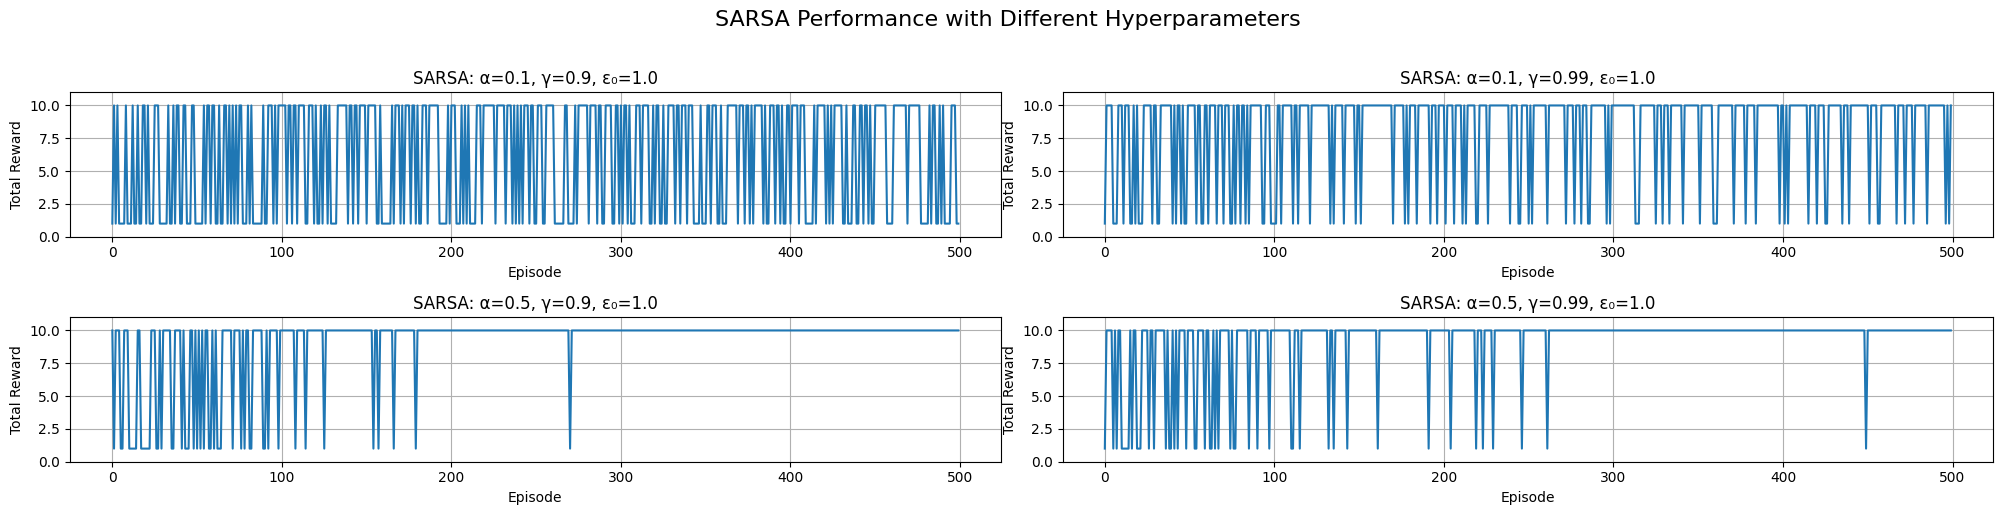

In [28]:
# Experiment with different hyperparameters for SARSA
learning_rates = [0.1, 0.5]        # Test different learning rates (alpha = 0.1 and 0.5)
discount_factors = [0.9, 0.99]     # Test different discount factors (gamma = 0.9 and 0.99)
exploration_rates = [1.0]          # Keep initial exploration rate (epsilon) at 1.0 for these tests
min_epsilon = 0.1                  # Minimum exploration rate (epsilon)
decay_rate = 0.01                  # Epsilon decay rate
episodes = 500                     # Number of episodes to train
max_steps = 100                    # Maximum steps per episode

# Store results for comparison
sarsa_results = []

# Define environment parameters again
rows, cols = 4, 4                  # Grid dimensions (4x4)
terminal_states = [(0, 0), (3, 3)] # Terminal states in the grid
rewards = {(0, 0): 1, (3, 3): 10}  # Rewards for terminal states
grid, state_space, action_space = create_gridworld(rows, cols, terminal_states, rewards)

# Run experiments with different hyperparameter combinations
print("Running SARSA with different hyperparameters...")
for alpha in learning_rates:  # Loop through learning rates
    for gamma in discount_factors:  # Loop through discount factors
        for initial_epsilon in exploration_rates:  # Loop through initial exploration rates
            print(f"  Training with alpha={alpha}, gamma={gamma}, epsilon_init={initial_epsilon}")
            
            # Run SARSA with the current hyperparameter set
            q_table, rewards_per_episode, episode_lengths = run_sarsa(
                state_space, action_space, rewards, terminal_states, rows, cols, alpha, gamma,
                initial_epsilon, min_epsilon, decay_rate, episodes, max_steps
            )

            # Store the results for later analysis
            sarsa_results.append({
                'alpha': alpha,                          # Learning rate
                'gamma': gamma,                          # Discount factor
                'initial_epsilon': initial_epsilon,      # Initial exploration rate
                'rewards_per_episode': rewards_per_episode,  # Rewards per episode
                'episode_lengths': episode_lengths       # Episode lengths
            })
print("Experiments finished.")

# --- Visualization of Hyperparameter Effects ---
num_results = len(sarsa_results)  # Total number of hyperparameter combinations tested
# Determine grid size for subplots (e.g., 2x2 for 4 results)
plot_rows = int(np.ceil(np.sqrt(num_results)))  # Number of rows in the subplot grid
plot_cols = int(np.ceil(num_results / plot_rows))  # Number of columns in the subplot grid

# Create a figure for the plots
plt.figure(figsize=(6 * plot_cols, 4 * plot_rows))  # Adjust figure size based on grid dimensions

# Create a larger figure to visualize all hyperparameter combinations
plt.figure(figsize=(20, 5))

# Plot the rewards per episode for each hyperparameter combination
for i, result in enumerate(sarsa_results):
    plt.subplot(plot_rows, plot_cols, i + 1)  # Create a subplot for each result
    plt.plot(result['rewards_per_episode'])  # Plot the rewards per episode
    plt.title(f"SARSA: α={result['alpha']}, γ={result['gamma']}, ε₀={result['initial_epsilon']}")  # Title with hyperparameters
    plt.xlabel('Episode')  # Label for the x-axis
    plt.ylabel('Total Reward')  # Label for the y-axis
    plt.grid(True)  # Add grid for better readability
    # Set consistent Y-axis limits across all plots for better comparison
    plt.ylim(
        min(min(r['rewards_per_episode']) for r in sarsa_results) - 1, 
        max(max(r['rewards_per_episode']) for r in sarsa_results) + 1
    )

# Add a super title for the entire figure
plt.suptitle("SARSA Performance with Different Hyperparameters", fontsize=16, y=1.02)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

# Applying SARSA to Different Environments (Cliff Walking)
In this section, we will apply the SARSA algorithm to a different environment: Cliff Walking. This environment is a classic reinforcement learning problem where the agent must navigate a grid while avoiding cliffs (negative rewards) to reach a goal state.

In [19]:
# Define the Cliff Walking environment parameters
cliff_rows, cliff_cols = 4, 12
cliff_start_state = (3, 0)
cliff_terminal_state = (3, 11)
cliff_states = [(3, c) for c in range(1, 11)]

# Define rewards: -1 for normal steps, -100 for cliff, +10 for goal (implicit goal reward handled by update)
# SARSA/Q-learning typically uses reward for *transitioning* into a state.
# We can simulate the standard Cliff Walking rewards: -1 per step, -100 for falling.
# Let's adapt the reward/transition logic slightly for this common setup.

# Modified State Transition and Reward for standard Cliff Walking
def cliff_state_transition_reward(
    state: Tuple[int, int],
    action: str,
    rows: int,
    cols: int,
    cliff_states: List[Tuple[int, int]],
    start_state: Tuple[int, int]
) -> Tuple[Tuple[int, int], int]:
    """
    Compute the next state and reward for Cliff Walking.
    Reward is -1 for normal steps, -100 for falling into cliff.
    Falling into cliff resets state to start_state.
    """
    row, col = state
    next_row, next_col = row, col

    # Calculate potential next position
    if action == 'up' and row > 0:
        next_row -= 1
    elif action == 'down' and row < rows - 1:
        next_row += 1
    elif action == 'left' and col > 0:
        next_col -= 1
    elif action == 'right' and col < cols - 1:
        next_col += 1

    next_state = (next_row, next_col)

    # Determine reward
    if next_state in cliff_states:
        reward = -100
        next_state = start_state # Reset to start if falls into cliff
    elif next_state == cliff_terminal_state:
        reward = 0 # Standard setup often gives 0 for reaching goal, -1 transition cost handled step reward
                   # Alternative: give +10 or other positive reward here if desired. Let's stick to -1 step cost.
        reward = -1 # Apply step cost even for reaching goal for consistency? No, goal transition is special.
                    # Let's use the common -1 step cost structure. Goal state itself gives no reward/penalty on arrival.
        reward = -1
    else:
        reward = -1 # Standard step cost

    return next_state, reward

In [20]:
# Modified SARSA episode runner for Cliff Walking reward structure
def run_sarsa_cliff_episode(
    q_table: Dict[Tuple[int, int], Dict[str, float]],
    action_space: List[str],
    terminal_state: Tuple[int, int],
    cliff_states: List[Tuple[int, int]],
    start_state: Tuple[int, int],
    rows: int,
    cols: int,
    alpha: float,
    gamma: float,
    epsilon: float,
    max_steps: int
) -> Tuple[int, int]:
    """ Runs a single episode of SARSA for Cliff Walking. """
    state = start_state
    action = epsilon_greedy_policy(state, q_table, action_space, epsilon)
    total_reward = 0
    steps = 0

    for _ in range(max_steps):
        next_state, reward = cliff_state_transition_reward(
            state, action, rows, cols, cliff_states, start_state
        )
        total_reward += reward

        next_action = epsilon_greedy_policy(next_state, q_table, action_space, epsilon)

        # Update Q-value for (s, a)
        # Special handling for terminal state: Q(terminal, any_action) = 0
        if next_state == terminal_state:
             q_next = 0.0
        else:
             # Check bounds and existence before accessing q_table
             if next_state in q_table and next_action in q_table[next_state]:
                 q_next = q_table[next_state][next_action]
             else: # Should not happen with full init, but safe check
                 q_next = 0.0

        td_target = reward + gamma * q_next
        td_error = td_target - (q_table[state][action] if state in q_table and action in q_table[state] else 0.0)
        if state in q_table and action in q_table[state]: # Check if state-action exists before updating
             q_table[state][action] += alpha * td_error

        state = next_state
        action = next_action
        steps += 1

        if state == terminal_state:
            break

    return total_reward, steps

In [21]:
# Modified SARSA runner function for Cliff Walking
def run_sarsa_cliff(
    action_space: List[str],
    terminal_state: Tuple[int, int],
    cliff_states: List[Tuple[int, int]],
    start_state: Tuple[int, int],
    rows: int,
    cols: int,
    alpha: float,
    gamma: float,
    initial_epsilon: float,
    min_epsilon: float,
    decay_rate: float,
    episodes: int,
    max_steps: int
) -> Tuple[Dict[Tuple[int, int], Dict[str, float]], List[int], List[int]]:
    """ Executes SARSA for Cliff Walking. """
    # Create state space dynamically or pass it - here, generating inside
    state_space = [(r, c) for r in range(rows) for c in range(cols)]
    q_table = initialize_q_table_nested(state_space, action_space)

    rewards_per_episode = []
    episode_lengths = []

    for episode in range(episodes):
        epsilon = adjust_epsilon(initial_epsilon, min_epsilon, decay_rate, episode)
        total_reward, steps = run_sarsa_cliff_episode(
            q_table, action_space, terminal_state, cliff_states, start_state,
            rows, cols, alpha, gamma, epsilon, max_steps
        )
        rewards_per_episode.append(total_reward)
        episode_lengths.append(steps)
        # Optional: Print progress
        # if (episode + 1) % 100 == 0:
        #     print(f"Episode {episode + 1}/{episodes} completed. Avg Reward (last 100): {np.mean(rewards_per_episode[-100:]):.2f}")


    return q_table, rewards_per_episode, episode_lengths

Let's run SARSA for Cliff Walking

In [22]:
# --- Run SARSA on Cliff Walking ---
# Hyperparameters (can be tuned)
alpha_cliff = 0.1         # Learning rate
gamma_cliff = 0.99        # Discount factor (higher gamma encourages looking further ahead)
initial_epsilon_cliff = 0.2 # Start with less exploration than 1.0? Let's try 0.2 initially, then maybe 1.0
min_epsilon_cliff = 0.01   # Lower minimum epsilon
decay_rate_cliff = 0.005   # Slower decay?
episodes_cliff = 500       # Number of episodes
max_steps_cliff = 200      # Max steps per episode

print("Running SARSA on Cliff Walking environment...")
# Define action space
cliff_action_space = ['up', 'down', 'left', 'right']

# Run the training
cliff_q_table_sarsa, cliff_rewards_sarsa, cliff_lengths_sarsa = run_sarsa_cliff(
    cliff_action_space, cliff_terminal_state, cliff_states, cliff_start_state,
    cliff_rows, cliff_cols, alpha_cliff, gamma_cliff,
    initial_epsilon_cliff, min_epsilon_cliff, decay_rate_cliff, episodes_cliff, max_steps_cliff
)
print("SARSA training on Cliff Walking finished.")

Running SARSA on Cliff Walking environment...
SARSA training on Cliff Walking finished.


To plot the rewards, we can use the following code.

In [23]:
# Plot rewards for the Cliff Walking environment
def plot_rewards(rewards_per_episode: List[int], ax: plt.Axes = None) -> plt.Axes:
    """
    Plot the total rewards accumulated over episodes.

    Parameters:
    - rewards_per_episode (List[int]): List of total rewards per episode.
    - ax (plt.Axes, optional): Matplotlib axis to plot on. If None, a new figure and axis are created.

    Returns:
    - plt.Axes: The Matplotlib axis containing the plot.
    """
    # If no axis is provided, create a new figure and axis
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the rewards over episodes
    ax.plot(rewards_per_episode)
    ax.set_xlabel('Episode')  # Label for the x-axis
    ax.set_ylabel('Total Reward')  # Label for the y-axis
    ax.set_title('Rewards Over Episodes')  # Title of the plot
    
    # Return the axis for further customization if needed
    return ax

To visualize the results, we can plot the rewards and episode lengths similar to before. Let's also visualize the learned policy for the Cliff Walking environment.

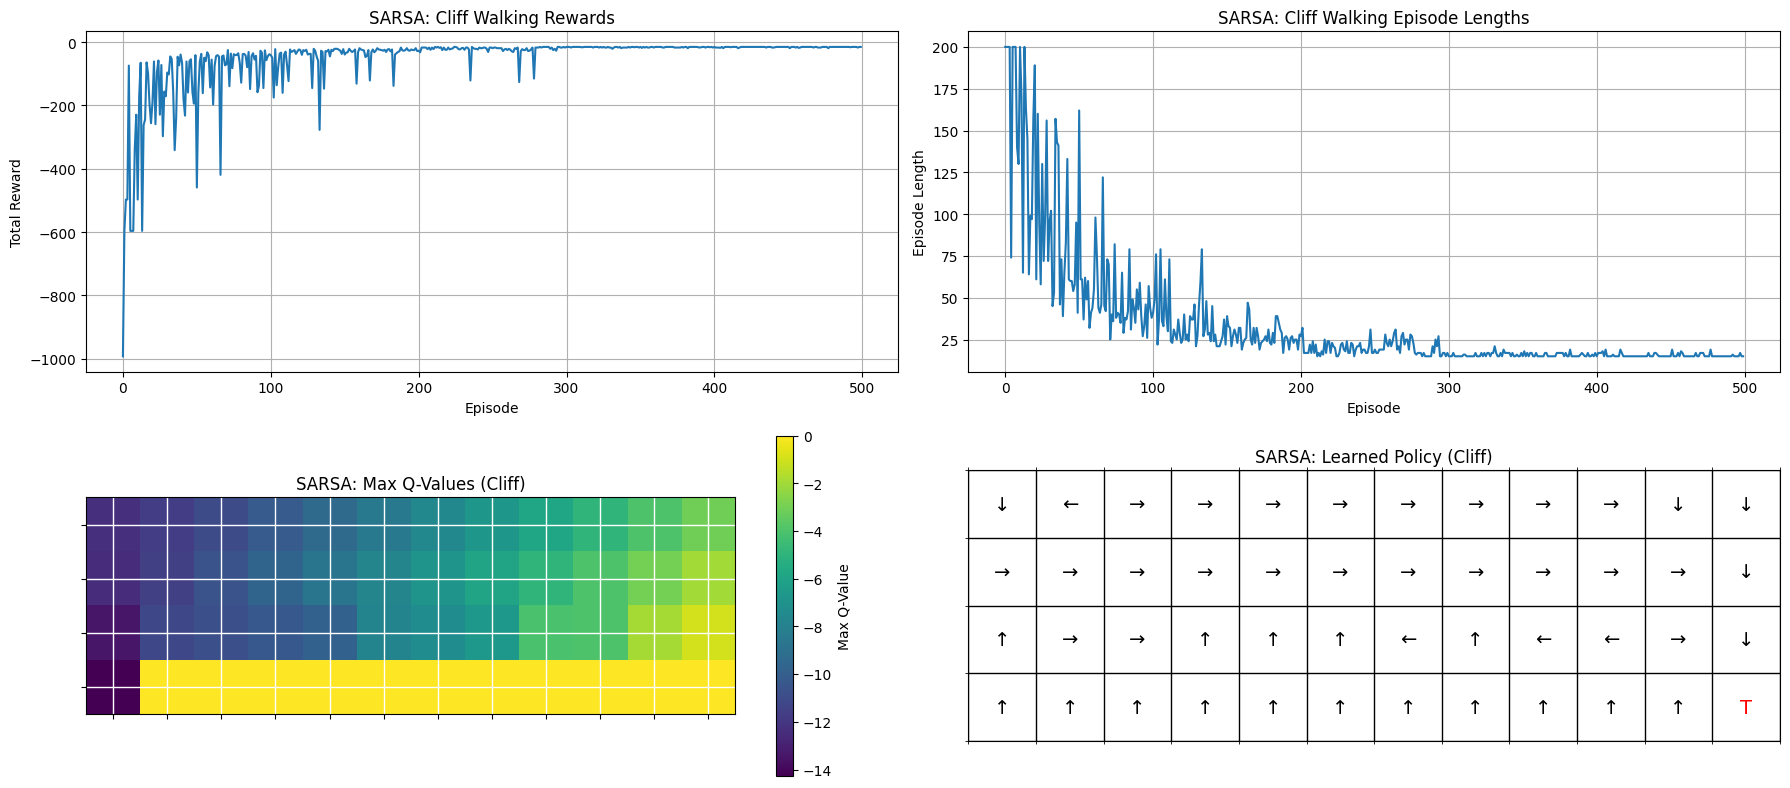

In [24]:
# --- Visualization for Cliff Walking (SARSA) ---
# Create a figure for multiple plots
fig_cliff, axs_cliff = plt.subplots(2, 2, figsize=(18, 8)) # Adjusted size slightly

# 1. Plot Rewards
plot_rewards(cliff_rewards_sarsa, ax=axs_cliff[0, 0])
axs_cliff[0, 0].set_title("SARSA: Cliff Walking Rewards")
axs_cliff[0, 0].grid(True)

# 2. Plot Episode Lengths
axs_cliff[0, 1].plot(cliff_lengths_sarsa)
axs_cliff[0, 1].set_xlabel('Episode')
axs_cliff[0, 1].set_ylabel('Episode Length')
axs_cliff[0, 1].set_title('SARSA: Cliff Walking Episode Lengths')
axs_cliff[0, 1].grid(True)

# Plot Max Q-Values (Heatmap) - Need a function that takes cliff env params
def plot_q_values_cliff(q_table, rows, cols, ax):
    q_values = np.zeros((rows, cols))
    for r in range(rows):
        for c in range(cols):
            state = (r, c)
            if state in q_table and q_table[state]:
                q_values[r, c] = max(q_table[state].values())
            else:
                q_values[r,c] = -np.inf # Mark unvisited/terminal

    # Mask cliff states for better visualization
    q_values_masked = np.ma.masked_where(q_values <= -100, q_values) # Hide extreme negatives from cliff

    im = ax.imshow(q_values_masked, cmap='viridis')
    plt.colorbar(im, ax=ax, label='Max Q-Value')
    ax.set_title('SARSA: Max Q-Values (Cliff)')
    ax.set_xticks(np.arange(cols))
    ax.set_yticks(np.arange(rows))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='major', color='w', linestyle='-', linewidth=1)

plot_q_values_cliff(cliff_q_table_sarsa, cliff_rows, cliff_cols, ax=axs_cliff[1, 0])


# 4. Plot Policy
plot_policy_grid(cliff_q_table_sarsa, cliff_rows, cliff_cols, [cliff_terminal_state], ax=axs_cliff[1, 1]) # Pass terminal state
axs_cliff[1, 1].set_title("SARSA: Learned Policy (Cliff)")


plt.tight_layout()
plt.show()

**Key Observations:**  

1. **Top-Left: Rewards Over Episodes**  
   - The total reward **improves significantly** over time, indicating successful learning.  
   - Early episodes show **high volatility**, with large negative rewards, likely due to frequent falls into the cliff.  
   - As training progresses, the rewards stabilize closer to **zero**, suggesting the agent has learned a near-optimal policy.  

2. **Top-Right: Episode Length Over Time**  
   - Initially, episode lengths are **very high** (over 200 steps), meaning the agent is struggling to reach the goal efficiently.  
   - As learning progresses, episode lengths **decrease rapidly**, stabilizing around 20–30 steps after about 200 episodes.  
   - Occasional spikes indicate **exploration-based deviations**, but overall, the agent converges toward an optimal route.  

3. **Bottom-Left: Max Q-Values Per State (Heatmap)**  
   - The **Q-values are lowest in the cliff region**, confirming that the agent recognizes the risk.  
   - The **upper areas of the grid have higher Q-values**, indicating safer and more rewarding paths.  
   - The **goal state has the highest Q-values**, reinforcing its desirability.  

4. **Bottom-Right: Learned Policy (Arrow Grid)**  
   - The **arrows indicate the agent’s optimal action at each state**.  
   - The agent follows a predominantly **rightward (→) and downward (↓) strategy**, prioritizing an efficient route to the goal.  
   - In the **cliff-adjacent row**, the agent takes a more cautious approach, often moving **up (↑) or left (←)** to avoid falling off.  
   - The terminal state ("T") at the bottom-right marks the goal.  

**Analysis:**  
- The **agent successfully learns an optimal policy**, balancing exploration and exploitation.  
- Early exploration leads to **high failure rates**, but SARSA enables the agent to refine its policy toward safer decisions.  
- **Q-value distribution confirms risk-awareness**, avoiding the cliff while optimizing rewards.  
- Compared to **Q-learning, SARSA typically favors safer paths**, which aligns with the observed policy adjustments near dangerous regions.  

Overall, the SARSA agent learns to **navigate the cliff environment efficiently**, minimizing penalties while improving its success rate.

## Common Challenges and Solutions

**Challenge: Slow learning or getting stuck**
*   **Solution**: Tune hyperparameters (α, γ, ε decay). Increase exploration initially or use more sophisticated exploration (e.g., Boltzmann). Function approximation might be needed for very large state spaces (though not used here).

**Challenge: Balancing exploration and exploitation**
*   **Solution**: Use a well-tuned epsilon decay schedule. Start high (near 1.0) and decay to a small value (e.g., 0.01 or 0.1). The decay rate determines how quickly the agent shifts from exploration to exploitation.

**Challenge: Choosing appropriate hyperparameters**
*   **Solution**: Experimentation is key. Common starting points:
    *   α (Learning Rate): 0.1 is often a good start. Higher values learn faster but can be unstable.
    *   γ (Discount Factor): 0.9 to 0.99. Higher values emphasize future rewards more.
    *   ε (Epsilon): Start high (1.0), decay to low (0.1 or 0.01). Adjust decay rate.

**Challenge: Sensitivity to initial Q-values**
*   **Solution**: Initialize Q-values optimistically (to encourage exploration) or to zero. Consistency is important.

## SARSA vs. Other Reinforcement Learning Algorithms

### Advantages of SARSA
-   **On-Policy:** Learns the value of the policy being executed, which can be useful for policy evaluation or in situations where understanding the current behavior is important.
-   **Often More Stable/Conservative:** Because it accounts for exploration steps in its updates, it can be less prone to learning overly optimistic/risky policies compared to Q-Learning, especially near hazards (like the cliff).
-   **Guaranteed Convergence:** Converges under similar conditions as Q-learning (if all state-action pairs are visited infinitely often and learning rate decays appropriately).
-   Relatively simple to understand and implement.

### Limitations of SARSA
-   **Can be Slower:** Learning the optimal policy might take longer than Q-learning because it learns based on the potentially suboptimal exploratory actions taken.
-   **Suboptimal Policy during Learning:** Since it learns based on the current (possibly exploratory) policy, the learned policy during the intermediate stages might be less optimal than what Q-learning might estimate.
-   **Same State Space Limitations:** Like Q-Learning, tabular SARSA struggles with very large or continuous state/action spaces.

### Related Algorithms
-   **Q-Learning**: The classic off-policy TD control algorithm. Learns the optimal action-value function directly.
-   **Expected SARSA**: A variation that uses the *expected* Q-value of the next state (averaging over actions according to the policy) instead of the single sampled next action's Q-value. Often performs better than SARSA.
-   **SARSA(λ) / True Online SARSA(λ)**: Incorporates eligibility traces to speed up learning by propagating updates back through sequences of states and actions.
-   **Actor-Critic Methods**: Combine value-based approaches (like SARSA/Q-Learning) with policy-based approaches, learning both a value function and a policy explicitly.

## Conclusion

SARSA is a fundamental on-policy temporal difference (TD) control algorithm in reinforcement learning. Its key characteristic is updating Q-values based on the action actually taken in the next state according to the current policy (State-Action-Reward-State-Action quintuple).

This on-policy nature often leads to more conservative but potentially more stable learning compared to its off-policy counterpart, Q-learning, especially in environments with significant risks. As demonstrated in the Cliff Walking example, SARSA tends to learn safer paths. While tabular SARSA shares limitations with Q-learning regarding large state spaces, its principles form the basis for more advanced on-policy algorithms used in complex domains. Understanding SARSA provides valuable insight into the core concepts of on-policy learning and TD control.